## convert image to bit array
to be copied into main.c for display on spherical rotating display

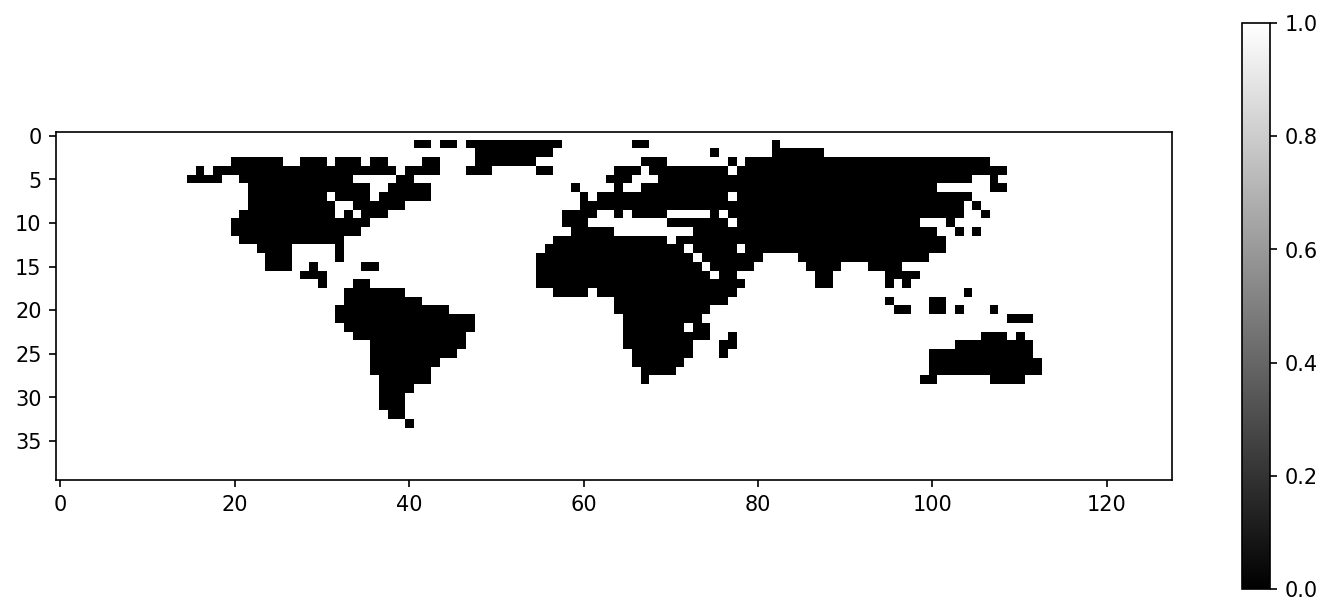

In [20]:
#display image
%reset -f
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import cv2

threshold = 1

#any image
BGR_pic = cv2.imread('world.png')
pic = cv2.cvtColor(BGR_pic, cv2.COLOR_BGR2RGB)
bw_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
bw_pic = cv2.resize(bw_pic,(128,40),interpolation = cv2.INTER_LINEAR)

#plot
fig = plt.figure(figsize=(12,5), dpi=150)

plt.subplot(1,1,1)
plt.imshow(bw_pic>threshold, cmap='gray')
plt.colorbar()
#plt.axis('off')

plt.show()

In [21]:
bw_pic.shape , bw_pic

((40, 128),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [14]:
import math
import numpy as np

#convert to binary and rearrange bit positions
binary = np.fliplr( bw_pic<threshold )
for r in range(0,5):
    binary[8*(r-1):8*r,:] = np.flipud( binary[8*(r-1):8*r,:] )
binary = binary.astype(int)

dim = np.shape(binary)

#combine into string
sphere = '{'
for width in range(0,dim[1]):
    sphere += '{'
    for height in range(0,math.ceil(dim[0]/8)):
        sphere += '0b'
        for add in range(0,8):
            sphere += str(binary[height*8+add,width])
        sphere += ','
    sphere = sphere[0:-1]
    sphere += '},'
sphere = sphere[0:-1]
sphere += '}'

print(sphere)

{{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00000000,0b00000000},{0b00000000,0b00000000,0b00000000,0b00001100,0b00000000},{0b00000000,0b00000000,0b00100000,0b00001111,0b00000000},{0b00000000,0b00000000,0b10100

In [15]:
import codecs

#write to file
data = codecs.open('bit_array.txt','w', "utf-8", errors='ignore')
data.write(sphere)
data.close()
